## Load dataset using `mlcroissant`

- Dataset is zip archive containing one collection's csv from nuldc-metadata and images
- Uses three recordSets

Problems with Joins:
- Joins in spec: https://docs.mlcommons.org/croissant/docs/croissant-spec.html#joins
- https://github.com/mlcommons/croissant/issues/683
- https://github.com/mlcommons/croissant/issues/700
- https://github.com/mlcommons/croissant/issues/651


In [3]:
from mlcroissant import Dataset

ds = Dataset(jsonld="billy-mckinney-collection-croissant.json")
works = ds.records("works_with_images")

  -  [Metadata(Digital Collections Bill McKinney collection)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(Digital Collections Bill McKinney collection)] Property "https://schema.org/datePublished" is recommended, but does not exist.
  -  [Metadata(Digital Collections Bill McKinney collection)] Property "https://schema.org/version" is recommended, but does not exist.


## Convert to Pandas Dataframe

In [4]:
import pandas as pd

df = pd.DataFrame.from_records(list(works))
print(df)

                      works_with_images/id  \
0  b'005d9412-9226-4424-bb37-b24380f6aa8a'   
1  b'08fed12f-43ee-42e6-8cb0-0629d8203759'   
2  b'2c5175f4-58d5-4d38-9b72-748e7586696e'   
3  b'3aaff5bd-6223-46be-8c91-77b88677ca75'   
4  b'55c8fc0f-7ce8-4b83-acfe-451903ef4a6c'   
5  b'ee8623cc-96f2-4f92-970f-f35fefdbda05'   

                             works_with_images/image  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                             works_with_images/title  
0  b'Scrapbook of Zion-Benton High School years (...  
1      b'Scrapbook of Northwestern University years'  
2                  b'Newspaper clippings, 1978-1995'  
3              b'Photographs, 1975, circa 1978-1983'  
4        

# Display as HTML table with inline images

,works_with_images/id,works_with_images/image,works_with_images/title
0,b'005d9412-9226-4424-bb37-b24380f6aa8a',,"b'Scrapbook of Zion-Benton High School years (unbound, 36 leaves)'"
1,b'08fed12f-43ee-42e6-8cb0-0629d8203759',,b'Scrapbook of Northwestern University years'
2,b'2c5175f4-58d5-4d38-9b72-748e7586696e',,"b'Newspaper clippings, 1978-1995'"
3,b'3aaff5bd-6223-46be-8c91-77b88677ca75',,"b'Photographs, 1975, circa 1978-1983'"
4,b'55c8fc0f-7ce8-4b83-acfe-451903ef4a6c',,"b'Photographs, 1975-1976'"
5,b'ee8623cc-96f2-4f92-970f-f35fefdbda05',,"b'Signed posters, certificate of participation, Wildcats Time Out article, ""NBA Lists"" from Hoop'"

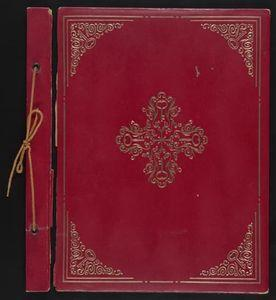
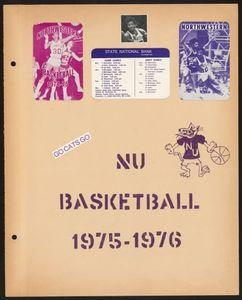
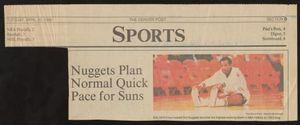
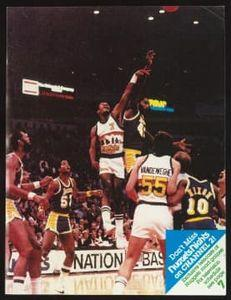
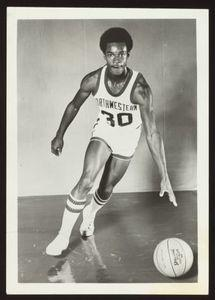
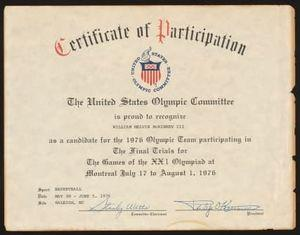

In [5]:
from PIL import Image
from IPython.display import display
from io import BytesIO
from IPython.display import HTML
import base64


def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i


def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'
 
 
# Now we can do all the stuff with a one-liner.
html_code = df.to_html(formatters={'works_with_images/image': image_formatter}, escape = False)
HTML(html_code)